In [45]:
import numpy as np
import matplotlib.pyplot as plt
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


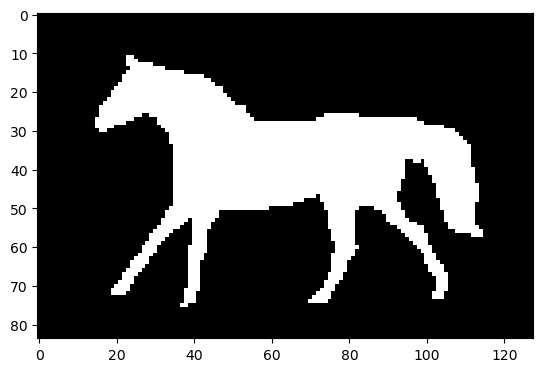

In [11]:
import imageio.v3 as iio
im = iio.imread('C:\\Work\\Teaching\\Machine Learning\\Data\horse025b.png')
im=torch.tensor(im).float()
plt.imshow(im.numpy(),cmap='gray')

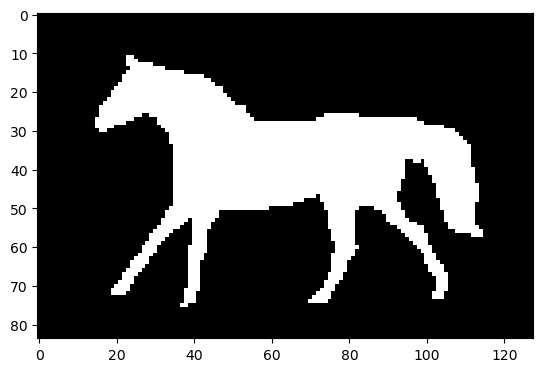

In [36]:
from torch.utils.data import TensorDataset, DataLoader
r,c=im.shape
x=torch.zeros(r*c,2).to(device)
y=torch.zeros(r*c).to(device)
for i in range(r):
    for j in range(c):
        idx=i*c+j
        #idx=j*r+i
        x[idx,0]=i
        x[idx,1]=j
        y[idx]=im[i,j]
mx=torch.mean(x,0)
sx=torch.std(x,0)
x=(x-mx)/sx
my=torch.mean(y)
y=y-my
plt.imshow(y.reshape(r,c).cpu().numpy(),cmap='gray')
dataset = TensorDataset(x,y)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 128)
        self.fc = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc(x)
        return x
    
net=Net()
net=net.to(device)
n=x.shape[0]
criterion=nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.00001, momentum=0.9)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[100,200], gamma=0.2)
losses=[]
for epoch in range(300):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        xi, yi = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(xi).squeeze()
        loss = criterion(outputs, yi)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    running_loss = running_loss/n
    losses.append(running_loss)
    if epoch % 10 == 9:   
        print('[%d] loss: %1.3f'%(epoch+1,running_loss))
    scheduler.step()

plt.plot(losses)
print('Finished Training')

[10] loss: 64.587
[20] loss: 51.890
[30] loss: 48.051
[40] loss: 42.423


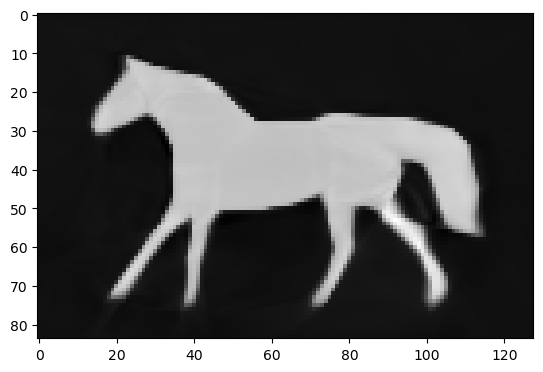

In [51]:
with torch.no_grad():
    py=net(x)
plt.imshow(py.reshape(r,c).cpu().numpy(),cmap='gray')

In [68]:
x = np.loadtxt("d:/datasets/uci/madelon/madelon_train.data")
y = np.loadtxt("d:/datasets/uci/madelon/madelon_train.labels", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/madelon/madelon_valid.data")
yt = np.loadtxt("d:/datasets/uci/madelon/madelon_valid.labels", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(2000, 500) (2000,) (600, 500) (600,)


In [62]:
x = np.loadtxt("d:/datasets/uci/dexter/dexter_train.csv", delimiter=',')
y = np.loadtxt("d:/datasets/uci/dexter/dexter_train.labels", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/dexter/dexter_valid.csv", delimiter=',')
yt = np.loadtxt("d:/datasets/uci/dexter/dexter_valid.labels", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(300, 20000) (300,) (300, 20000) (300,)


In [50]:
x = np.loadtxt("d:/datasets/uci/hill-valley/x.dat")
y = np.loadtxt("d:/datasets/uci/hill-valley/y.dat", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/hill-valley/xtest.dat")
yt = np.loadtxt("d:/datasets/uci/hill-valley/ytest.dat", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(606, 100) (606,) (606, 100) (606,)


In [16]:
x = np.loadtxt("d:/datasets/uci/gisette/gisette_train.data")
y = np.loadtxt("d:/datasets/uci/gisette/gisette_train.labels", delimiter=',')
xt = np.loadtxt("d:/datasets/uci/gisette/gisette_valid.data")
yt = np.loadtxt("d:/datasets/uci/gisette/gisette_valid.labels", delimiter=',')
print(x.shape,y.shape,xt.shape,yt.shape)

(6000, 5000) (6000,) (1000, 5000) (1000,)


In [69]:
sx=np.std(x,axis=0)
x=x[:,sx>0]
xt=xt[:,sx>0]
mx=np.mean(x,axis=0)
sx=np.std(x,axis=0)
print(x.shape)
x=torch.tensor((x-mx)/sx).float()
xt=torch.tensor((xt-mx)/sx).float()
y=torch.tensor(y).float()
yt=torch.tensor(yt).float()
print(torch.std(x,axis=0))

(2000, 500)
tensor([1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003, 1.0003,
        1.0003, 1.0003, 1.00

In [70]:
n=x.shape[0]
nt=xt.shape[0]
y1=y.clone()
yt1=yt.clone()

In [71]:
y[y<0]=0
yt[yt<0]=0

In [72]:
x,y,y1=x.to(device),y.to(device),y1.to(device)
xt,yt,yt1=xt.to(device),yt.to(device),yt1.to(device)